# Name: Shreya Sadashiva Kamath
# Github Username: shreyasa31
# USC-ID: 7553148882

## **Project: Building a classifier to analyze the sentiment of reviews using MLP, CNN, RNN**

### **b) Data Exploration and Pre-processing**

*i) Binary Encoding where positive sentiment=1 and negative sentiment=-1*

In [23]:
# Paths to your data directories
positive_review_path = './Data/pos'
negative_review_path = './Data/neg'

In [36]:
import os
import numpy as np

def data_loading(dir, label):
    texts = []
    labels = []
    filenames = []  # List to hold filenames
    for f in os.listdir(dir):
        if f.endswith(".txt"):
            # Construct the full file path
            file_path = os.path.join(dir, f)
            # Open and read the file
            with open(file_path, 'r', encoding='utf-8') as fdata:
                texts.append(fdata.read())
            labels.append(label)
            filenames.append(f)  # Store the filename
    return texts, labels, filenames

# Specify the paths to your data directories
positive_review_path = './Data/pos'
negative_review_path = './Data/neg'

# Load all data
pos_texts, pos_labels, pos_filenames = data_loading(positive_review_path, 1)  # Positive sentiment
neg_texts, neg_labels, neg_filenames = data_loading(negative_review_path, -1)  # Negative sentiment

# Combine data
texts = pos_texts + neg_texts
labels = pos_labels + neg_labels
filenames = pos_filenames + neg_filenames  # Combine filenames

# Convert labels to a numpy array for use with Keras
labels = np.array(labels)


In [37]:
labels

array([ 1,  1,  1, ..., -1, -1, -1])

In [39]:
filenames

['cv000_29590.txt',
 'cv001_18431.txt',
 'cv002_15918.txt',
 'cv003_11664.txt',
 'cv004_11636.txt',
 'cv005_29443.txt',
 'cv006_15448.txt',
 'cv007_4968.txt',
 'cv008_29435.txt',
 'cv009_29592.txt',
 'cv010_29198.txt',
 'cv011_12166.txt',
 'cv012_29576.txt',
 'cv013_10159.txt',
 'cv014_13924.txt',
 'cv015_29439.txt',
 'cv016_4659.txt',
 'cv017_22464.txt',
 'cv018_20137.txt',
 'cv019_14482.txt',
 'cv020_8825.txt',
 'cv021_15838.txt',
 'cv022_12864.txt',
 'cv023_12672.txt',
 'cv024_6778.txt',
 'cv025_3108.txt',
 'cv026_29325.txt',
 'cv027_25219.txt',
 'cv028_26746.txt',
 'cv029_18643.txt',
 'cv030_21593.txt',
 'cv031_18452.txt',
 'cv032_22550.txt',
 'cv033_24444.txt',
 'cv034_29647.txt',
 'cv035_3954.txt',
 'cv036_16831.txt',
 'cv037_18510.txt',
 'cv038_9749.txt',
 'cv039_6170.txt',
 'cv040_8276.txt',
 'cv041_21113.txt',
 'cv042_10982.txt',
 'cv043_15013.txt',
 'cv044_16969.txt',
 'cv045_23923.txt',
 'cv046_10188.txt',
 'cv047_1754.txt',
 'cv048_16828.txt',
 'cv049_20471.txt',
 'cv050_11

*ii) Removing punctuations and numbers*

In [40]:
import re

def cleaning_text(texts):
    new_texts = []
    for t in texts:
        # Remove punctuation and numbers
        t = re.sub(r'[^\w\s]', '', t)  # Remove punctuation   
        t = re.sub(r'\d', '', t)  # Remove digits
        # Append the cleaned text
        new_texts.append(t)
    return new_texts

cleaned_texts = cleaning_text(texts)


*iii) Splitting test and train test in both positive and negative*

In [57]:
def splitting_data(cleanedtexts, labels, filenames):
    train_data, test_data = [], []
    train_labels, test_labels = [], []
    train_filenames, test_filenames = [], []

    for text, label, filename in zip(cleanedtexts, labels, filenames):
        num_part = int(filename[2:5])
        if 0 <= num_part <= 699:
            train_data.append(text)
            train_labels.append(label)
            train_filenames.append(filename)
        elif 700 <= num_part <= 999:
            test_data.append(text)
            test_labels.append(label)
            test_filenames.append(filename)

    return train_data, train_labels, train_filenames, test_data, test_labels, test_filenames


In [61]:
# Split the combined data based on filenames
train_data, train_labels, train_filenames, test_data, test_labels, test_filenames = split_based_on_filename(cleaned_texts, labels, filenames)


In [62]:
print("Number of files in the training set:", len(train_filenames))
print("Number of files in the testing set:", len(test_filenames))

Number of files in the training set: 1400
Number of files in the testing set: 600


*iv Counting number of Unique words*

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer


combined_data=train_data+test_data

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(combined_data)

# Count the number of unique words
unique_word_count = len(tokenizer.word_index)

print("Number of unique words in both Train and Test dataset:", unique_word_count)


Number of unique words in both Train and Test dataset: 46737


*v) Average review length and the standard deviation of review length*

In [66]:
import numpy as np

# Calculate the length of each review
review_lengths = [len(review.split()) for review in combined_texts]

# Calculate the average length and standard deviation of the reviews
average_length = np.mean(review_lengths)
std_dev_length = np.std(review_lengths)

print("Average review length:", average_length)
print("Standard deviation of review lengths:", std_dev_length)


Average review length: 644.3575
Standard deviation of review lengths: 284.98012333099655


*vi) Plotting Histogram*

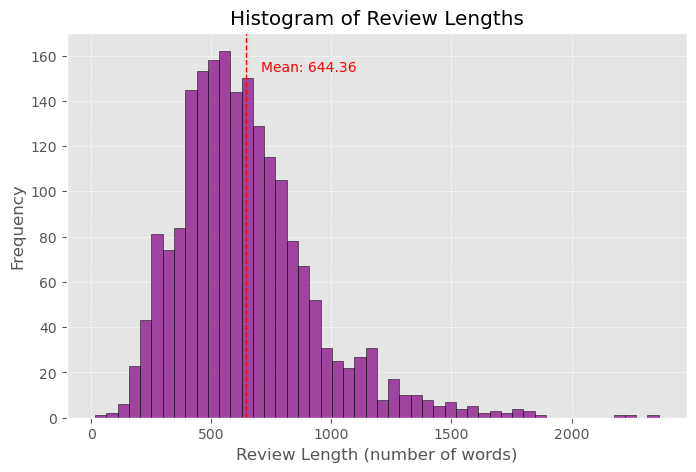

In [72]:
import matplotlib.pyplot as plt

# Set a style for the plot
plt.style.use('ggplot')  # Using 'ggplot' style for a cleaner and more modern look

# Plotting the histogram of review lengths with smaller dimensions
plt.figure(figsize=(8, 5))  # Adjusted to smaller size
plt.hist(review_lengths, bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length (number of words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', linewidth=0.5)  # Adjust grid visibility and style
plt.axvline(x=np.mean(review_lengths), color='red', linestyle='dashed', linewidth=1)  # Mean line
plt.text(np.mean(review_lengths) * 1.1, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(np.mean(review_lengths)),
         color='red')  # Add text for mean value

plt.show()

*vii) Ranking the words*

In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer


# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(combined_data)

# Now tokenize each document
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

# Optionally, you might want to also see the word index to understand the frequency mapping
word_index = tokenizer.word_index
print("Word Index (word: rank):", word_index)

# Displaying some tokenized sequences to verify
print("Tokenized sequences (Train):", train_sequences[0:5])  # Show first 5 sequences from training data
print("Tokenized sequences (Test):", test_sequences[0:5])  # Show first 5 sequences from testing data


Word Index (word: rank): {'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'that': 8, 'it': 9, 'as': 10, 'with': 11, 'for': 12, 'his': 13, 'this': 14, 'film': 15, 'but': 16, 'he': 17, 'i': 18, 'on': 19, 'are': 20, 'by': 21, 'be': 22, 'its': 23, 'an': 24, 'not': 25, 'one': 26, 'movie': 27, 'who': 28, 'from': 29, 'at': 30, 'was': 31, 'have': 32, 'has': 33, 'her': 34, 'you': 35, 'they': 36, 'all': 37, 'so': 38, 'like': 39, 'about': 40, 'out': 41, 'more': 42, 'when': 43, 'which': 44, 'their': 45, 'up': 46, 'or': 47, 'what': 48, 'some': 49, 'just': 50, 'if': 51, 'there': 52, 'she': 53, 'him': 54, 'into': 55, 'even': 56, 'only': 57, 'than': 58, 'no': 59, 'we': 60, 'good': 61, 'most': 62, 'time': 63, 'can': 64, 'will': 65, 'story': 66, 'films': 67, 'been': 68, 'would': 69, 'much': 70, 'also': 71, 'characters': 72, 'other': 73, 'get': 74, 'character': 75, 'do': 76, 'them': 77, 'very': 78, 'two': 79, 'first': 80, 'after': 81, 'see': 82, 'well': 83, 'because': 84, 'way': 85, 'make

*viii) Select review length that 70% of reviews have a length below it*

In [76]:
# Calculate the 70th percentile of review lengths
L_70 = np.percentile(review_lengths, 70)
print("70% of the reviews have a length below:", L_70)

# Calculate the 90th percentile of review lengths
L_90 = np.percentile(review_lengths, 90)
print("90% of the reviews have a length below:", L_90)

70% of the reviews have a length below: 737.0
90% of the reviews have a length below: 993.4000000000005


*ix) Truncate review Length*

In [78]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume you have already decided on 'L' based on percentiles
L = int(np.percentile(review_lengths, 70))  # for example, using the 70th percentile as L

# Assuming 'train_sequences' and 'test_sequences' are already tokenized sequences of your texts
# Truncate and pad training sequences
train_padded = pad_sequences(train_sequences, maxlen=L, truncating='post', padding='post')

# Truncate and pad testing sequences
test_padded = pad_sequences(test_sequences, maxlen=L, truncating='post', padding='post')

print("Example of padded training sequence:", train_padded[0])
print("Example of padded testing sequence:", test_padded[0])


Example of padded training sequence: [   67  2745    29   355  1634    32    90  1047     4   627   628   321
    40  7660   704  4783  1755    47  7257  1328   396  4949    47     1
 10837  1777  1778   148    16   140   108    89    68     2   355   405
    39    29   503   142    12  9974     9    31   853    21  1352  1802
     3   944  1512    28   879     1  3951     5     2   282   113   540
     7     1  7258   126    11     2   202   262   381     1 27315     5
   180  1802     3  1512  1882 27316     1   845     4   495     1 13221
    69    22    39   820   325  1231     6  2142     5   175     2    94
  1232     1   405    47  1549   523    51    35    65     6   111  4950
   196     3  1233   440    42     8  9266     4   181    16 20915     7
    73   637   119  6914    14    15    84     4    23  2110    51    35
    64    74   403     1   282   355   405   179    35   228   188   124
  6595  2808     7    29 11930   880  2858     3  1029  2592   333     1
  2592   620  

## **C) Word Embeddings**

In [96]:
# import numpy as np
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Flatten
# import tensorflow as tf



# # Set parameters
# vocab_size = 5000  # Maximum number of words to keep based on word frequency
# max_length = 50  # Maximum length of each document (number of words per document)
# embedding_dim = 32  # Dimension of the embedding vector

# # Step 1: Tokenize the text
# tokenizer = Tokenizer(num_words=vocab_size)
# tokenizer.fit_on_texts(cleaned_texts)
# sequences = tokenizer.texts_to_sequences(cleaned_texts)

# # Step 2: Pad sequences to ensure uniform input size
# padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# # Define the model
# model = Sequential([
#     Embedding(vocab_size, embedding_dim, input_length=max_length),
#     Flatten()  # Flatten the embeddings to use them for further processing or model building
# ])

# # Get the embeddings for the padded sequences
# embeddings = model.predict(padded_sequences)

# # The embeddings are already flattened by the Flatten layer in the model
# flattened_embeddings = embeddings

# print("Flattened Embeddings Shape:", flattened_embeddings.shape)
# print("Flattened Embeddings Sample:", flattened_embeddings[0])


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
Flattened Embeddings Shape: (2000, 1600)
Flattened Embeddings Sample: [ 0.00328205 -0.03651291 -0.0429371  ...  0.02876261 -0.0004254
  0.04408804]


In [118]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# # Define your model
# model = Sequential()
# # Add Embedding layer
# # Note: Set input_dim to the vocabulary size (e.g., 5000), and output_dim to 32 as specified
# model.add(Embedding(input_dim=5000, output_dim=32, input_length=L))
# # Flatten the output of the embedding to pass it to dense layers
# model.add(Flatten())
# # Add first dense layer with dropout
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.2))
# # Add second dense layer with dropout
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# # Add third dense layer with dropout
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# # Output layer with a single neuron and sigmoid activation for binary classification
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model with the Adam optimizer and binary cross entropy loss function
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# # Training the model
# model.fit(train_padded, train_labels, epochs=2, batch_size=10, verbose=1)

# # Evaluate the model on training data
# train_loss, train_accuracy = model.evaluate(train_padded, train_labels, verbose=0)
# # Evaluate the model on testing data
# test_loss, test_accuracy = model.evaluate(test_padded, test_labels, verbose=0)

# # Print accuracies
# print(f'Train Accuracy: {train_accuracy:.4f}')
# print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.6869
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6667 - loss: 0.6906
Train Accuracy: 0.5000
Test Accuracy: 0.3333


## **d) MultiLayer Perceptron**

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model definition
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=L))  # Assuming L is predefined or calculated based on data
model.add(Flatten())  # Flatten the matrix of each document to a vector
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))  # 20% dropout rate for the first dense layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))  # 50% dropout rate for subsequent layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Model compilation
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Assuming `train_padded` and `test_padded` are the padded sequences from your dataset
# Assuming `train_labels` and `test_labels` are the labels for your training and test sets
# Training the model
history = model.fit(train_padded, train_labels, epochs=2, batch_size=10, validation_data=(test_padded, test_labels))

# Report train and test accuracies
train_acc = history.history['accuracy'][-1]
test_acc = history.history['val_accuracy'][-1]
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1667 - loss: 0.6979 - val_accuracy: 0.6667 - val_loss: 0.6929
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.6962 - val_accuracy: 0.6667 - val_loss: 0.6929
Train Accuracy: 0.5000
Test Accuracy: 0.6667


In [122]:
train_labels

array([1, 0, 1, 0, 1, 0])

In [123]:
test_labels

array([0, 1, 0, 1, 0, 0])